In [1]:
from sympy import *
from sympy import init_printing;  init_printing(use_latex='mathjax')

In [16]:
var('W k')
variables = input('Ingrese las variables a usar: ')
var(variables)
potencial = sympify(input('Ingrese el potencial del sistema: '))
lim = (input('Ingrese los limites de integración separados por un espacio (si desea ingresar infinito escriba "oo"): ')).split()
a = sympify(lim[0])
b = sympify(lim[1])
n = int(input('Ingrese el numero de funciones: '))

funcion = []
for i in range(n):
    ff = input('Ingrese la funcion: ')
    funcion.append(ff)
funciones = sympify(funcion)

def Hamiltoniano(fun, potencial):
    K = (-hbar**2/(2*m))*diff(fun,x,2)
    P = potencial*fun
    return K + P

H = zeros(n,n)
S = zeros(n,n)
C = ones(n,n)

for i in range(n):
    for j in range(n):
        c = sympify('c%d%d'%(j+1,i+1))
        C[i,j] = C[i,j]*c
        H[i,j] = integrate(funciones[i]*Hamiltoniano(funciones[j],potencial),(x,a,b))
        S[i,j] = integrate(funciones[i]*funciones[j],(x,0,l))
        
Sols = solve((H-S*W).det(),W)

Ingrese las variables a usar: x m l hbar
Ingrese el potencial del sistema: 0
Ingrese los limites de integración separados por un espacio (si desea ingresar infinito escriba "oo"): 0 l
Ingrese el numero de funciones: 4
Ingrese la funcion: x*(l-x)
Ingrese la funcion: x**2*(l-x)**2
Ingrese la funcion: x*(l-x)*(l/2-x)
Ingrese la funcion: x**2*(l-x)**2*(l/2-x)


In [17]:
H

⎡  2  3    2  5                ⎤
⎢h̅ ⋅l   h̅ ⋅l                 ⎥
⎢──────  ──────    0       0   ⎥
⎢ 6⋅m     30⋅m                 ⎥
⎢                              ⎥
⎢  2  5    2  7                ⎥
⎢h̅ ⋅l   h̅ ⋅l                 ⎥
⎢──────  ──────    0       0   ⎥
⎢ 30⋅m   105⋅m                 ⎥
⎢                              ⎥
⎢                  2  5    2  7⎥
⎢                h̅ ⋅l   h̅ ⋅l ⎥
⎢  0       0     ──────  ──────⎥
⎢                 40⋅m   280⋅m ⎥
⎢                              ⎥
⎢                  2  7    2  9⎥
⎢                h̅ ⋅l   h̅ ⋅l ⎥
⎢  0       0     ──────  ──────⎥
⎣                280⋅m   1260⋅m⎦

In [18]:
S

⎡ 5     7             ⎤
⎢l     l              ⎥
⎢──   ───   0      0  ⎥
⎢30   140             ⎥
⎢                     ⎥
⎢  7    9             ⎥
⎢ l    l              ⎥
⎢───  ───   0      0  ⎥
⎢140  630             ⎥
⎢                     ⎥
⎢            7     9  ⎥
⎢           l     l   ⎥
⎢ 0    0   ───   ──── ⎥
⎢          840   5040 ⎥
⎢                     ⎥
⎢            9     11 ⎥
⎢           l     l   ⎥
⎢ 0    0   ────  ─────⎥
⎣          5040  27720⎦

In [19]:
for i in range(n):
    Sols[i] = Sols[i]*m*l**2/(hbar**2)
Sols.sort()
for i in range(n):
    Sols[i] = Sols[i]*hbar**2/(m*l**2)
Sols

⎡  2                   2                  2                  2             ⎤
⎢h̅ ⋅(-2⋅√133 + 28)  h̅ ⋅(-18⋅√5 + 60)  h̅ ⋅(2⋅√133 + 28)  h̅ ⋅(18⋅√5 + 60)⎥
⎢──────────────────, ─────────────────, ─────────────────, ────────────────⎥
⎢        2                   2                  2                 2        ⎥
⎣       l ⋅m                l ⋅m               l ⋅m              l ⋅m      ⎦

In [21]:
for q in range(len(Sols)):
    sistema = (H-S*Sols[q])*C.col(q)
    solucion = solve(sistema,C)
    list_key_value = Matrix([[k,v] for k, v in solucion.items()])
    t = len(list_key_value.col(0))
    for i in range(n):
        for j in range(1,t+1):
            if C[i,q] == list_key_value.col(0)[t-j]:
                C[i,q] = list_key_value.col(1)[t-j]
        if (sympify('c%d%d'%(q+1,i+1)) in solucion) == False:
            cc = sympify('c%d%d'%(q+1,i+1))
    C = C.subs(cc,k)
C

⎡   2           2                            2      2                  ⎤
⎢k⋅l    √133⋅k⋅l                     √133⋅k⋅l    k⋅l                   ⎥
⎢──── + ─────────        0         - ───────── + ────         0        ⎥
⎢ 3         21                           21       3                    ⎥
⎢                                                                      ⎥
⎢       k                0                 k                  0        ⎥
⎢                                                                      ⎥
⎢                     2         2                              2      2⎥
⎢                  k⋅l    √5⋅k⋅l                         √5⋅k⋅l    k⋅l ⎥
⎢       0          ──── + ───────          0           - ─────── + ────⎥
⎢                   33       11                             11      33 ⎥
⎢                                                                      ⎥
⎣       0                k                 0                  k        ⎦

In [22]:
func = Matrix([funciones])
Phis = zeros(n,1)
Real_Phis = zeros(n,1)
for i in range(n):
    Phis[i] = func*C.col(i)
    cons_normal = N(solve(integrate(Phis[i]**2,(x,a,b))-1,k)[1])
    Real_Phis[i] = N(Phis[i].subs(k,cons_normal))
Real_Phis

⎡                                                0.5                          
⎢                                2           ⎛1 ⎞                        2    
⎢              4.40399751133633⋅l ⋅x⋅(l - x)⋅⎜──⎟    + 4.99034859672658⋅x ⋅(l 
⎢                                            ⎜ 9⎟                             
⎢                                            ⎝l ⎠                             
⎢                                                                             
⎢                                                0.5                          
⎢                   2                       ⎛ 1 ⎞                        2    
⎢ 16.7823521557751⋅l ⋅x⋅(0.5⋅l - x)⋅(l - x)⋅⎜───⎟    + 71.8478164291383⋅x ⋅(0.
⎢                                           ⎜ 11⎟                             
⎢                                           ⎝l  ⎠                             
⎢                                                                             
⎢                                                 0.

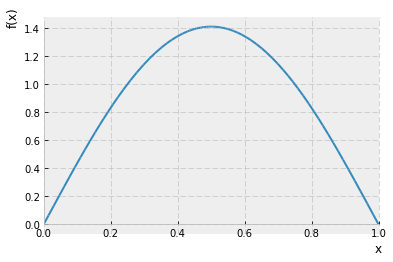

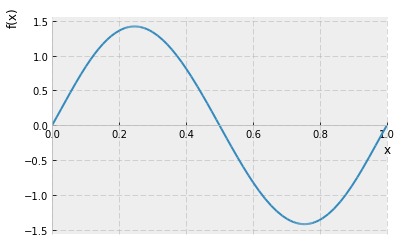

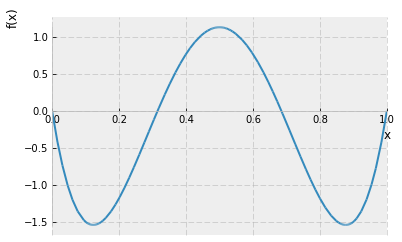

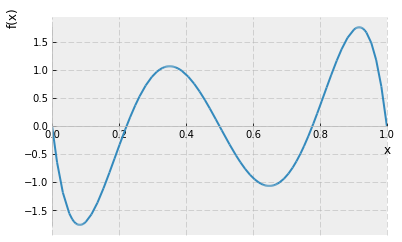

In [23]:
from matplotlib import style
style.use('bmh')
for i in range(n):
    p = plot(Real_Phis[i].subs(l,1),(x,0,1), grid = True)